<a href="https://colab.research.google.com/github/LuisPablo19/pytriplets/blob/main/UF_6_Actividad_Evaluable_Mapas_de_calor_y_boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UF-6 Actividad Evaluable: Mapas de calor y boxplots

Amairany Rodríguez | A01702927

Renata Chavez | A01351716

Luis Pablo Padilla Barbosa | A00572040

3 de junio de 2023

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib as plt

In [ ]:
clientes = pd.read_csv('Clientes (SN).csv')
costos = pd.read_csv('Costos de produccion (SN).csv')
saldos = pd.read_csv('Cuentas por cobrar (SN).csv')
facturacion = pd.read_csv('Facturacion (SN).csv')
gastos = pd.read_csv('Gastos (SN).csv')

In [ ]:
clientes.head(10)

,CLAVE,RFC,NOMBRE
0,1,AMQ911121AL8,ASOCIACION DE MIPYMES INDUSTRIALES DE QUERETARO
1,2,GCA900118AX6,GRUPO COMERCIAL ACOMEE
2,3,AAVJ630625FJ4,ANDRADE VILLANUEVA JUAN GERARDO
3,5,MDI8312134L0,MANUFACTURAS DIVERSAS
4,6,MME640509AS8,MANUFACTURAS METALICAS
5,7,LIC950821M84,LICONSA
6,8,MEVA731216II2,ARACELI MENDOZA VILLAFUERTE
7,9,BAC800208B25,BACHOCO
8,10,PELE540716BH8,EDGARDO ARTURO PEÑA LOPEZ
9,17,GAM950228IZ5,GRUPO ABC DE MEXICO


In [ ]:
costos.head(10)

,Unnamed: 0,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,SUBTOTAL_PARTIDA,COSTO_TOTAL,MARGEN_UNITARIO,MARGEN_TOTAL
0,0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,434.48,52.80,381.68,381.68
1,1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,1264.05,327.18,936.87,936.87
2,2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,3861.29,1243.73,373.94,2617.56
3,3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,140.00,38.96,101.04,101.04
4,4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,344.83,203.42,70.71,141.41
5,5,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00243,BAN P INOX 55MMX235MM 450W 127V T/TOR,237.07,49.41,474.14,98.82,187.66,375.32
6,6,F37044,2022-01-05,DIEGO ARMANDO LEON DURAN,AIRBUS HELICOPTERS MEXICO QUERETARO,1,RP00165,REPARACION DE BATIDOR 16.6KW 440V,14000.00,5323.76,14000.00,5323.76,8676.24,8676.24
7,7,F37046,2022-01-05,LETICIA RAMIREZ HERNANDEZ,ANA BARBARA CRUZ PALACIOS,3,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,94.50,38.96,283.50,116.88,55.54,166.62
8,8,F37048,2022-01-05,DIEGO ARMANDO LEON DURAN,FIDEICOMISO F/1596,1,TUE00207,"TUB INCOLOY 1/2""Øx412mm J 9KW 240V PLACA",1615.00,517.89,1615.00,517.89,1097.11,1097.11
9,9,F37049,2022-01-05,DIEGO ARMANDO LEON DURAN,FIDEICOMISO F/1596,1,TUE00207,"TUB INCOLOY 1/2""Øx412mm J 9KW 240V PLACA",1615.00,517.89,1615.00,517.89,1097.11,1097.11


In [ ]:
saldos.head(10)

,No. CLIENTE,NOMBRE,CVE_DOC,FECHA_FACTURA,FECHA_VENCIMIENTO,MONTO ADEUDADO
0,6401,DONGA HWASUNG MEXICO,F40238,2023-02-24,2023-03-26,97485.94
1,6401,DONGA HWASUNG MEXICO,F40353,2023-03-14,2023-04-13,97485.94
2,4598,PROVEEDORA DE SEGURIDAD INDUSTRIAL DEL GOLFO,F40352,2023-03-14,2023-04-13,64916.21
3,3930,INDUSTRIAS LANCERMEX,F40217,2023-02-23,2023-03-25,52715.74
4,4712,HELVEX,F40173,2023-02-17,2023-04-03,50639.80
5,1429,AUTOLIV STEERING WHEELS MEXICO,F39979,2023-01-24,2023-03-25,49416.00
6,1429,AUTOLIV STEERING WHEELS MEXICO,F40319,2023-03-08,2023-05-07,49416.00
7,644,CLAVOS NACIONALES C.N,F40340,2023-03-13,2023-05-12,45216.34
8,644,CLAVOS NACIONALES C.N,F40351,2023-03-14,2023-05-13,45216.34
9,2046,TRANSPORTADORES Y FABRICACIONES INDUSTRIALES,F40118,2023-02-10,2023-03-12,37588.59


In [ ]:
facturacion.head(10)

,CVE_DOC,CVE_CLIENTE,STATUS,CVE_VEND,FECHA,FECHA_DOC,FECHA_ENT,FECHA_VENCIMIENTO,FECHA_CANCELA,CAN_TOT,DESCUENTO,DES_FIN,RFC,SERIE,TIP_DOC,CVE_PEDI,FECHAELAB,FOLIO,DOC_ANT
0,F29414,2465,C,1.0,2019-09-03 08:58:42.000,2019-09-03 00:00:00,2019-09-03 00:00:00,2019-09-18,2019-09-04,3980.000,0.0,0.0,YOR-030722-UV8,F,E,Sin clave,1567501122000000000,Sin folio,Sin clave
1,F29415,3926,C,1.0,2019-09-03 09:55:14.000,2019-09-03 00:00:00,2019-09-03 00:00:00,2019-10-03,2019-09-03,1550.000,0.0,0.0,PPE 490224 HI0,F,E,Sin clave,1567504514000000000,Sin folio,Sin clave
2,F29416,3926,C,1.0,2019-09-03 13:25:33.000,2019-09-03 00:00:00,2019-09-03 00:00:00,2019-10-03,2019-09-03,1550.000,0.0,0.0,PPE 490224 HI0,F,E,Sin clave,1567517133000000000,Sin folio,Sin clave
3,F29417,3926,C,1.0,2019-09-03 13:33:23.000,2019-09-03 00:00:00,2019-09-03 00:00:00,2019-10-03,2019-09-17,1550.000,0.0,0.0,PPE 490224 HI0,F,E,Sin clave,1567517603000000000,Sin folio,Sin clave
4,F29418,6813,C,2.0,2019-09-03 14:23:45.000,2019-09-03 00:00:00,2019-09-03 00:00:00,2019-09-03,2019-09-10,2435.440,0.0,0.0,MPI130528640,F,E,Sin clave,1567520625000000000,Sin folio,Sin clave
5,F29419,2465,E,1.0,2019-09-04 09:15:12.000,2019-09-04 00:00:00,2019-09-04 00:00:00,2019-09-19,2050-01-01,3979.998,0.0,0.0,YOR-030722-UV8,F,E,Sin clave,1567588512000000000,Sin folio,Sin clave
6,F29420,6828,C,2.0,2019-09-04 10:53:53.000,2019-09-04 00:00:00,2019-09-04 00:00:00,2019-09-04,2019-09-04,402.590,0.0,0.0,ZUNS721009FQ2,F,E,Sin clave,1567594433000000000,Sin folio,Sin clave
7,F29421,6828,E,2.0,2019-09-04 10:56:44.000,2019-09-04 00:00:00,2019-09-04 00:00:00,2019-09-04,2050-01-01,402.590,0.0,0.0,ZUNS721009FQ2,F,E,Sin clave,1567594604000000000,Sin folio,Sin clave
8,F29422,5926,C,2.0,2019-09-04 11:14:44.000,2019-09-04 00:00:00,2019-09-02 00:00:00,2019-09-04,2019-09-04,1606.740,0.0,0.0,XAXX 010101 000,F,E,Sin clave,1567595684000000000,Sin folio,Sin clave
9,F29423,5926,C,2.0,2019-09-04 12:23:05.000,2019-09-04 00:00:00,2019-09-02 00:00:00,2019-09-04,2019-09-04,1144.430,0.0,0.0,XAXX 010101 000,F,E,Sin clave,1567599785000000000,Sin folio,Sin clave


In [ ]:
gastos.head(10)

,Unnamed: 0,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO_GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL,TOTAL SAT,TIPO,STATUS,POLIZA,MP
0,0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,0,PUE
1,1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,0,PUE
2,2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,0,PUE
3,3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,0,PUE
4,4,2020-01-01,944,FCB00679-F8D9-4890-9E8B-C2F6B10EB88E,GIC9001301A6,GRUPO INDUSTRIAL CASILLAS SA DE CV,MAQUILAS GIC,MAQUILA,1.0,32068.97,5131.03,0.0,0.0,37200.00,37200.00,I,Vigente,0,PUE
5,5,2020-01-01,945,C0CA7FD7-66E9-4E76-BCAB-F359F1F8528D,GIC9001301A6,GRUPO INDUSTRIAL CASILLAS SA DE CV,MAQUILAS GIC,MAQUILA,1.0,8620.69,1379.31,0.0,0.0,10000.00,10000.00,I,Vigente,PE07-ENE20,PUE
6,6,2020-01-01,22019120028311,3AF035FC-435F-DD4C-9663-6369E2DB8CA9,IFO9409288P6,"INTERCAM FONDOS, S.A. DE C.V. SOCIEDAD OPERADO...",COMISION BANCARIA,Comisiones y Otros Cargos,1.0,0.01,0.00,0.0,0.0,0.01,0.00,I,Vigente,0,PUE
7,7,2020-01-01,61485334,3617EDA0-AE92-4D8E-B2E0-FF6281F0C876,ODM950324V2A,OFFICE DEPOT DE MEXICO S.A. DE C.V.,PAPELERIA,AGENDA ESCR SELLADA NEGRA,1.0,159.48,25.52,0.0,0.0,185.00,185.00,I,Vigente,0,PUE
8,8,2020-01-01,138,3EFD2E4D-A415-4C0D-BDF6-3B4CAE23DA82,OIOR780428TL9,MARIA DEL ROSARIO OVIEDO ORTIZ,MTTO COMPUTO,Paquete de Timbres para CFDI,1.0,480.00,76.80,0.0,0.0,556.80,556.80,I,Vigente,0,PUE
9,9,2020-01-01,139,83708F3A-9673-45E4-BC9E-06F6A119E1B4,OIOR780428TL9,MARIA DEL ROSARIO OVIEDO ORTIZ,MTTO COMPUTO,Servicio de Asesoría,1.0,2500.00,400.00,0.0,0.0,2900.00,2900.00,I,Vigente,0,PUE


## Gráficas para análisis de variables

### Boxplot

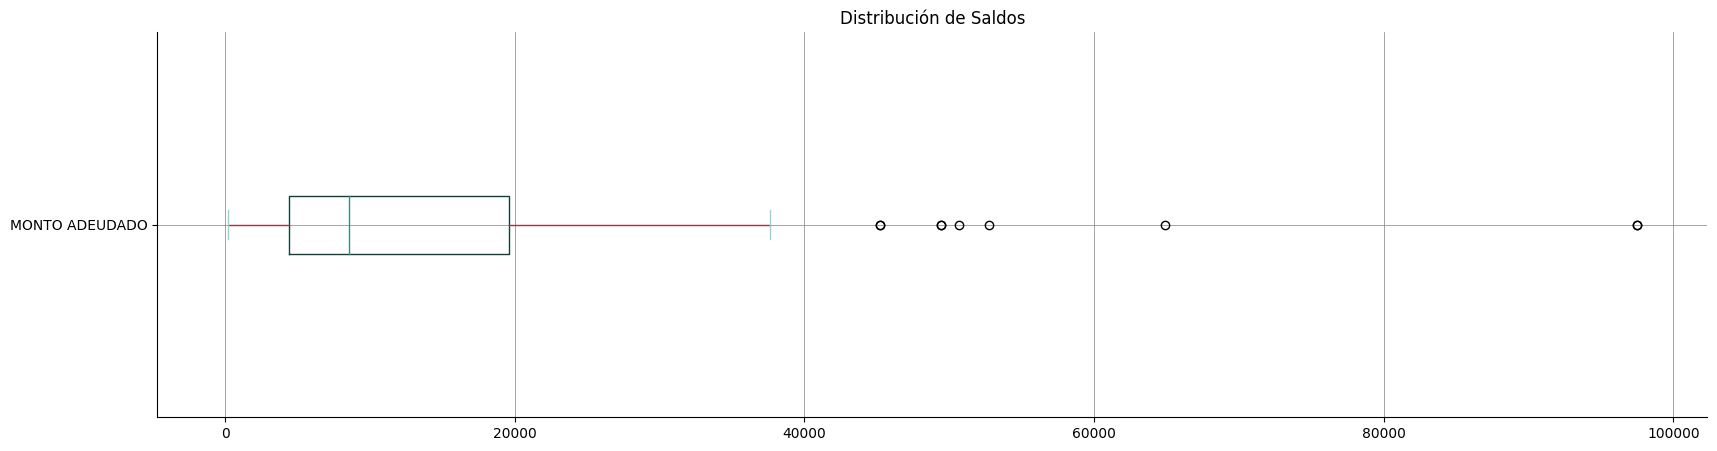

In [ ]:
color = {'medians': '#3f8880', 'boxes': '#10423c', 'whiskers': '#883f47', 'caps': '#8fd8cf'}
ax = saldos.plot.box(figsize=(20, 5), color=color, vert=False)
ax.set_title('Distribución de Saldos')
ax.grid(linestyle='-', linewidth=0.5, color='#808080')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

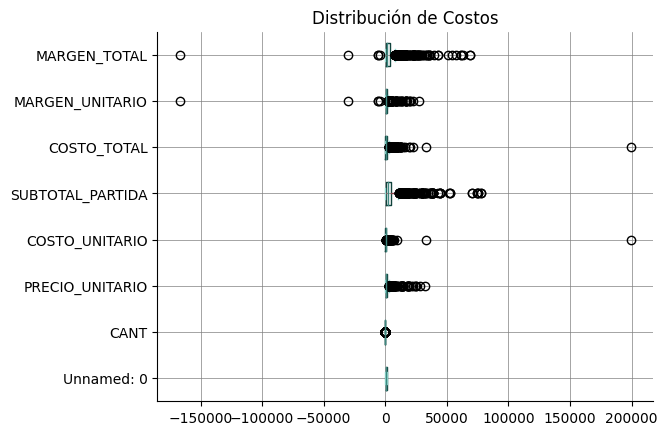

In [ ]:
color = {'medians': '#3f8880', 'boxes': '#10423c', 'whiskers': '#883f47', 'caps': '#8fd8cf'}
ax = costos.plot.box(color=color, vert=False)
ax.set_title('Distribución de Costos')
ax.grid(linestyle='-', linewidth=0.5, color='#808080')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

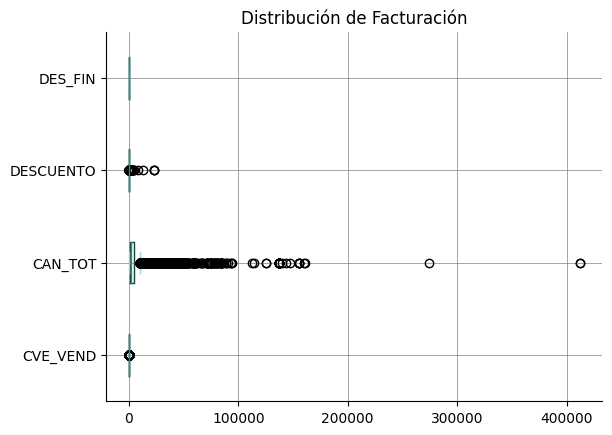

In [ ]:
color = {'medians': '#3f8880', 'boxes': '#10423c', 'whiskers': '#883f47', 'caps': '#8fd8cf'}
ax = facturacion.plot.box(color=color, vert=False)
ax.set_title('Distribución de Facturación')
ax.grid(linestyle='-', linewidth=0.5, color='#808080')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

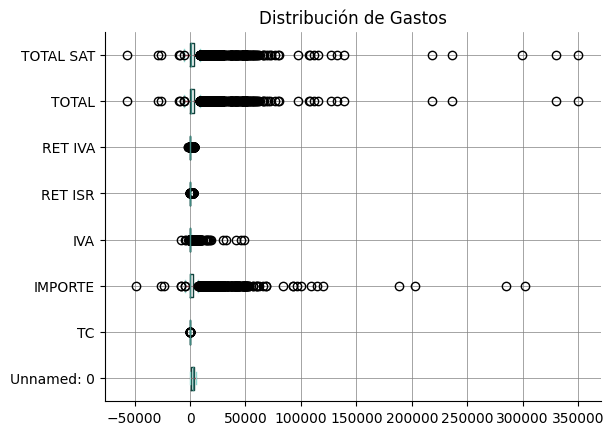

In [ ]:
color = {'medians': '#3f8880', 'boxes': '#10423c', 'whiskers': '#883f47', 'caps': '#8fd8cf'}
ax = gastos.plot.box(color=color, vert=False)
ax.set_title('Distribución de Gastos')
ax.grid(linestyle='-', linewidth=0.5, color='#808080')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Mapas de Calor

<ipython-input-16-a2470d21a856>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=gastos.corr(), annot=True, cmap= "PuOr", linewidth=1).set(title='Correlation Gastos')


[Text(0.5, 1.0, 'Correlation Gastos')]

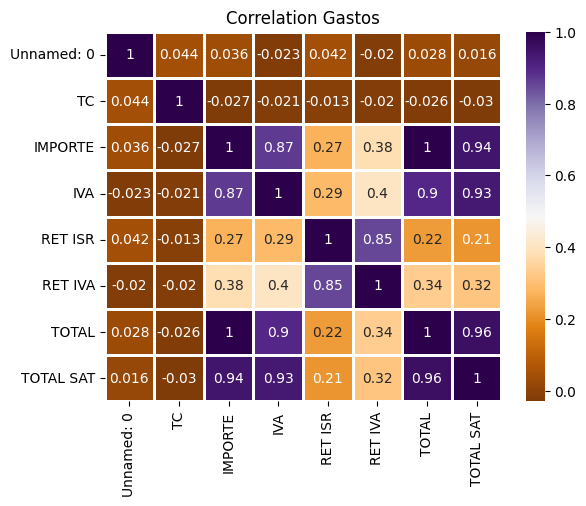

In [ ]:
sns.heatmap(data=gastos.corr(), annot=True, cmap= "PuOr", linewidth=1).set(title='Correlation Gastos')